In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #file handling
import pathlib

In [3]:
train_dir='F:/Harshita/Datasets/diseaseClass/train'
test_dir='F:/Harshita/Datasets/diseaseClass/test'

In [4]:
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)
print("\n")
print(f'In total we have {len(class_names)} classes')

['Acne and Rosacea Photos' 'Eczema Photos'
 'Light Diseases and Disorders of Pigmentation'
 'Melanoma Skin Cancer Nevi and Moles' 'Vascular Tumors'
 'Warts Molluscum and other Viral Infections' 'noDisease']


In total we have 7 classes


In [5]:
#Tensorflow libraries
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [6]:
IMG_SIZE=(224,224)
#Generating traina and test datasets
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              image_size=IMG_SIZE,
                                                               batch_size=32,shuffle = True
                                                              )
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                             image_size=IMG_SIZE,
                                                              batch_size=32,shuffle = True
                                                             )

Found 4828 files belonging to 7 classes.
Found 1253 files belonging to 7 classes.


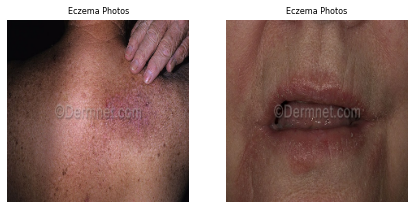

In [6]:
#Sample images
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
for image_batch, label_batch in train_data.take(1):
    for i in range(2):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]],fontsize = 8)
        plt.axis("off")

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Data pre-processing using keras
data_augmentation = keras.Sequential([
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomFlip('horizontal')
], name ="data_augmentation")

In [8]:
#InceptionV3 model

# Activation function used - Adam with learing_rate = 0.001
# Loss function - sparse_categorical_crossentropy
# Metrics - accuracy

base_model =tf.keras.applications.inception_v3.InceptionV3(
                                                           include_top=False,
                                                           weights=None
                                                           )
    

base_model.trainable = True
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="GloPool")(x)
outputs = tf.keras.layers.Dense(7, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)
model_0.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

In [9]:
# Fitting model to data
model_0.fit(train_data,
           epochs=10,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=int(0.25*len(test_data))
           )

Epoch 1/10
151/151 [==============================] - 1429s 9s/step - loss: 1.8027 - accuracy: 0.2390 - val_loss: 1.8064 - val_accuracy: 0.2313
Epoch 2/10
151/151 [==============================] - 1340s 9s/step - loss: 1.7069 - accuracy: 0.3018 - val_loss: 1.6644 - val_accuracy: 0.3219
Epoch 3/10
151/151 [==============================] - 1240s 8s/step - loss: 1.6422 - accuracy: 0.3384 - val_loss: 1.8169 - val_accuracy: 0.2594
Epoch 4/10
151/151 [==============================] - 1314s 9s/step - loss: 1.5979 - accuracy: 0.3610 - val_loss: 1.7583 - val_accuracy: 0.2562
Epoch 5/10
151/151 [==============================] - 1387s 9s/step - loss: 1.6028 - accuracy: 0.3623 - val_loss: 1.6958 - val_accuracy: 0.3125
Epoch 6/10
151/151 [==============================] - 1364s 9s/step - loss: 1.5589 - accuracy: 0.3799 - val_loss: 1.5957 - val_accuracy: 0.3750
Epoch 7/10
151/151 [==============================] - 1430s 9s/step - loss: 1.5102 - accuracy: 0.4033 - val_loss: 1.5734 - val_accuracy:

In [11]:
model_0.evaluate(test_data) #test data accuracy

40/40 [==============================] - 71s 2s/step - loss: 1.5321 - accuracy: 0.3935


[1.532077431678772, 0.39345571398735046]

In [10]:
# saving model
model_0.save('disClass.h5')

In [12]:
# Predicting some samples
import matplotlib.pyplot as plt
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

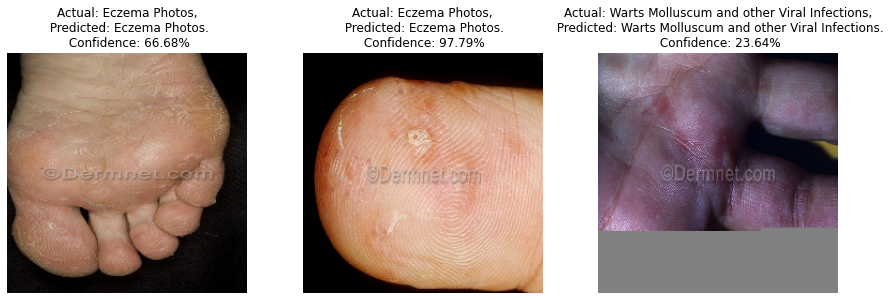

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model_0, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")